# Stereographic Projection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mayavi import mlab
import math
import array as arr

def get_az(x, y):
    # Gives azimuth angle given cartesian coordinates x, y 
    az = np.arctan2(y, x)               
    return az

def get_theta(x, y, z):
    # Gives theta angle given cartesian coordinates x, y, z
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z / r)
    return theta

def polar_to_cart(r, incl, az): 
    # Converts spherical coordinates back to cartesian
    x = r * np.sin(incl) * np.cos(az)
    y = r * np.sin(incl) * np.sin(az)
    z = r * np.cos(incl)
    return x, y, z

In [2]:
data = np.loadtxt('force_map_data_basis.csv', skiprows=1, dtype='float', delimiter=',', usecols=(0, 1, 2, 3), unpack=True)
data = data.T

- Column 0 is x 
- Column 1 is y 
- Column 2 is z
- Column 3 is force value 

In [3]:
def proj_xy(x, y, z):
    # projects 3D coordinates onto z=-1 plane and returns corresponding 2D coordinates
    X = arr.array('f', [])
    Y = arr.array('f', [])
    for i in range(0, len(x)):
        x_in = (x[i]) / (2-(2*z[i]))
        y_in = (y[i]) / (2-(2*z[i]))
        X.append(x_in)
        Y.append(y_in)
    return X, Y

def return_check(x, y, z, force):
    # converts 3D coordinates to 2D and back to 3D and displays result to check projection equations
    X, Y = proj_xy(x, y, z)
    x_out = arr.array('f', [])
    y_out = arr.array('f', [])
    z_out = arr.array('f', [])
    for i in range(0, len(x)):
        x_in = (X[i]) / (1+(0.25*(X[i]**2))+(0.25*(Y[i]**2)))
        y_in = (Y[i]) / (1+(0.25*(X[i]**2))+(0.25*(Y[i]**2)))
        z_in = (-1+(0.25*(X[i]**2))+(0.25*(Y[i]**2))) / (1+(0.25*(X[i]**2))+(0.25*(Y[i]**2)))
        x_out.append(x_in)
        y_out.append(y_in)
        z_out.append(z_in)
    mlab.figure()
    mlab.points3d(x, y, z, force, scale_factor=0.2, scale_mode='none', colormap='viridis')
    mlab.orientation_axes()
    mlab.show()

In [4]:
# functions used to change radius of circle from 1.03149 to 1
def scale_radius(data):
    x = arr.array('f', [])
    y = arr.array('f', [])
    z = arr.array('f', [])
    for i in range(0, len(data[:,0])):
        theta = get_theta(data[:,0][i], data[:,1][i], data[:,2][i])
        az = get_az(data[:,0][i], data[:,1][i])
        
        x.append(np.sin(theta)*np.cos(az))
        y.append(np.sin(theta)*np.sin(az))
        z.append(np.cos(theta))
    return x, y, z

def scale_coords(coord_array):
    x = arr.array('f', [])
    y = arr.array('f', [])
    z = arr.array('f', [])
    theta = get_theta(coord_array[0], coord_array[1], coord_array[2])
    az = get_az(coord_array[0], coord_array[1])

    x.append(np.sin(theta)*np.cos(az))
    y.append(np.sin(theta)*np.sin(az))
    z.append(np.cos(theta))
    return x, y, z

In [5]:
# visual check
x, y, z = scale_radius(data)
mlab.figure(bgcolor=(1., 1., 1.))
mlab.points3d(x, y, z, data[:,3], scale_factor=0.2, scale_mode='none', colormap='viridis', opacity = 0.2)
mlab.orientation_axes()
#mlab.show()

In [6]:
# optionally used to rotate sphere to get optimal stereographic projection visual

def rotating_y(x, y, z, angle_degrees):
    # rotating around y axis
    rotation_rad = angle_degrees * (np.pi/180)
    x_rot = []
    y_rot = []
    z_rot = []
    for i in range(0, len(x)):
        x_rot.append((x[i]*np.cos(rotation_rad)) - (z[i]*np.sin(rotation_rad)))
        y_rot.append(y[i])
        z_rot.append((x[i]*np.sin(rotation_rad)) + (z[i]*np.cos(rotation_rad)))
    return x_rot, y_rot, z_rot

def rotating_x(x, y, z, angle_degrees):
    # rotating around x axis
    rotation_rad = angle_degrees * (np.pi/180)
    x_rot = []
    y_rot = []
    z_rot = []
    for i in range(0, len(x)):
        x_rot.append((x[i]))
        y_rot.append((y[i]*np.cos(rotation_rad))-(z[i]*np.sin(rotation_rad)))
        z_rot.append((y[i]*np.sin(rotation_rad)) + (z[i]*np.cos(rotation_rad)))
    return x_rot, y_rot, z_rot

def rotating_z(x, y, z, angle_degrees):
    # rotating around z axis
    rotation_rad = angle_degrees * (np.pi/180)
    x_rot = []
    y_rot = []
    z_rot = []
    for i in range(0, len(x)):
        x_rot.append((x[i]*np.cos(rotation_rad))-(y[i]*np.sin(rotation_rad)))
        y_rot.append((x[i]*np.sin(rotation_rad))-(y[i]*np.cos(rotation_rad)))
        z_rot.append((z[i]))
    return x_rot, y_rot, z_rot

In [7]:
# creating an equator line -> r = 1, elevation = 1-360, az = 90
r = []
incl = []
az = []
for i in range(0,360):
    r.append(1)
    az.append(i * (np.pi/180))
    incl.append(90 * (np.pi/180))
    
circ_x, circ_y, circ_z = polar_to_cart(r, incl, az)

# converting to 2D coordinates
X_circ, Y_circ = proj_xy(circ_x, circ_y, circ_z)

In [8]:
# visual check
mlab.figure(bgcolor=(1., 1., 1.))
mlab.points3d(x, y, z, data[:,3], scale_factor=0.2, scale_mode='none', colormap='viridis', opacity = 0.2)
mlab.points3d(0, 0, 1, scale_factor=0.2, scale_mode='none')
mlab.points3d(circ_x, circ_y, circ_z, color = (1.,1.,1.))
mlab.orientation_axes()
#mlab.show()

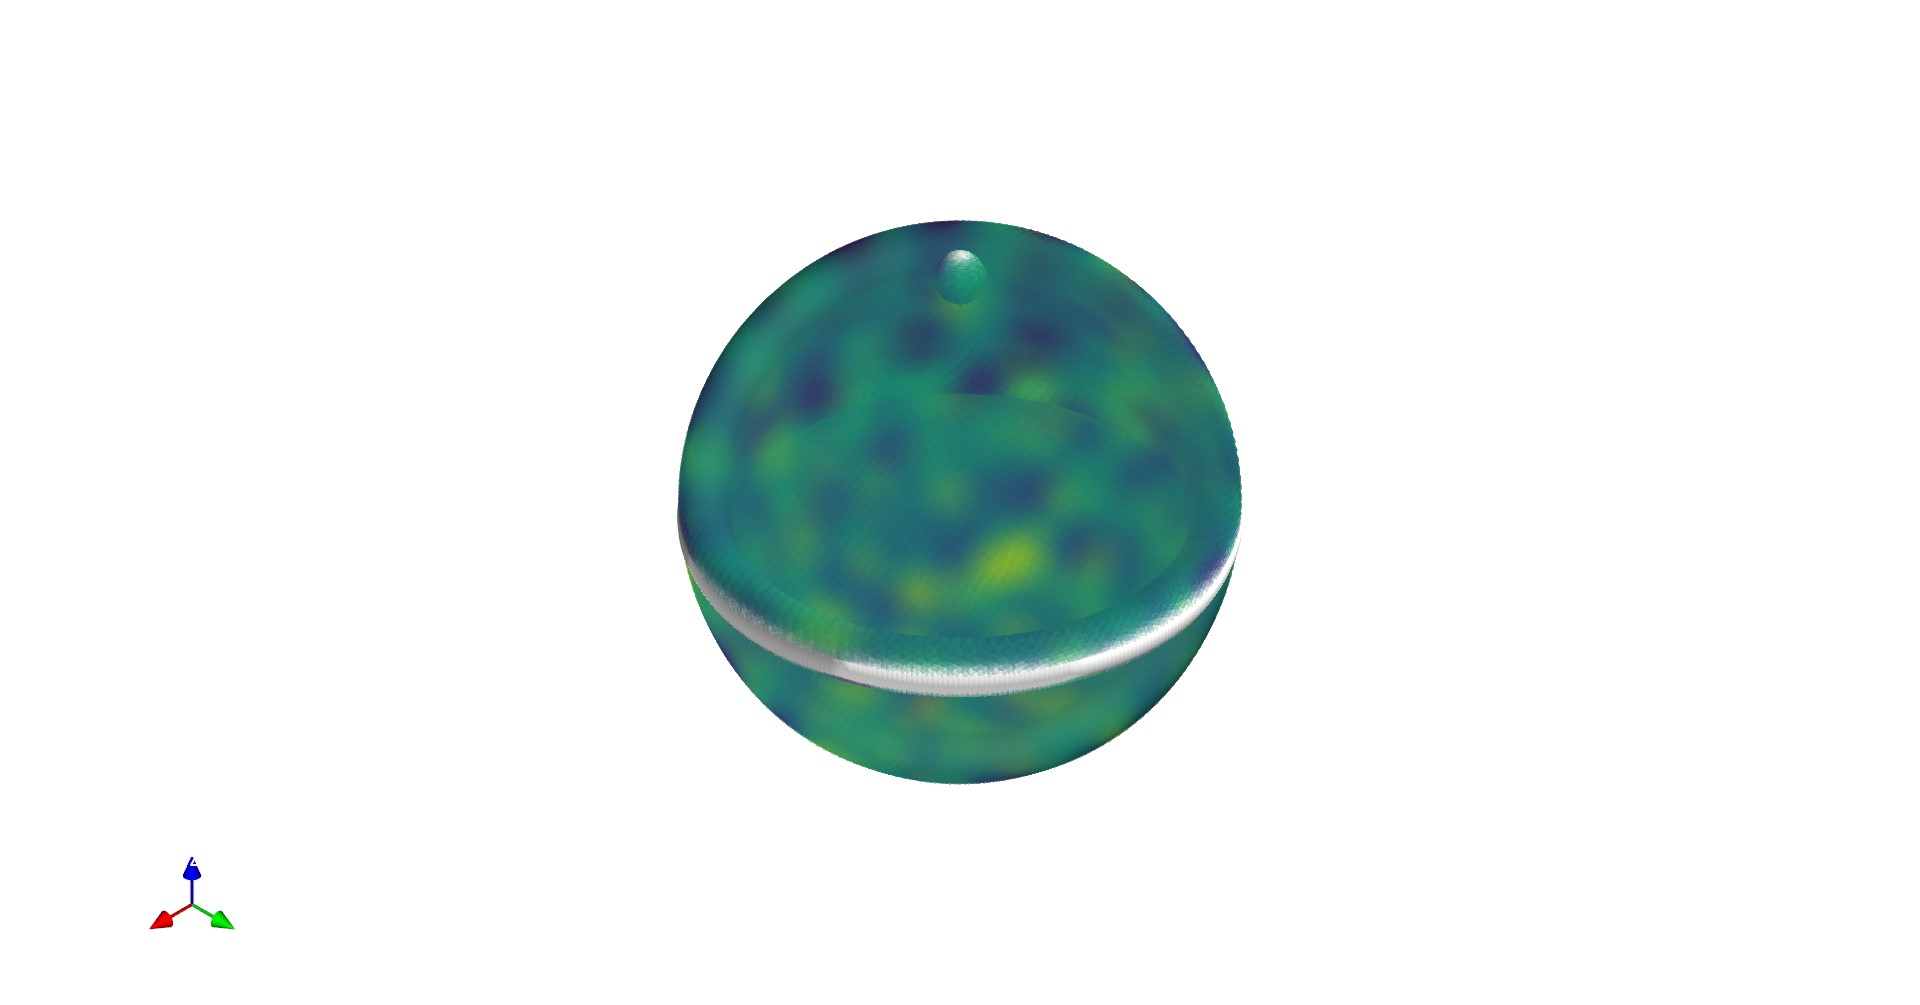

## Stereographic Projection Plot:

In [9]:
def set_size(w,h, ax=None):
    # makes axes even
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l) + 1.5
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

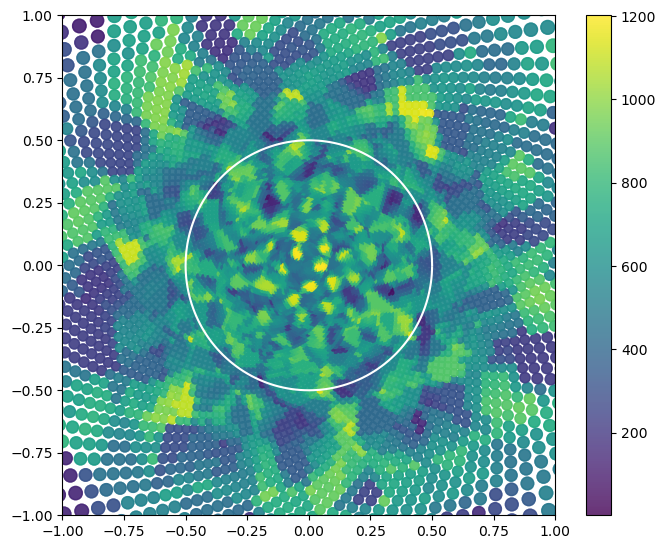

In [10]:
X, Y = proj_xy(x, y, z)
X = np.array(X)
Y = np.array(Y)
Z = data[:, 3]
fig, ax = plt.subplots()
set_size(5,5)
ax.plot(X_circ, Y_circ, c = 'white')
ax.scatter(X, Y, alpha=0.6, s=((X**2 + Y**2)+0.1)*50, c=Z, cmap='viridis')
im = ax.scatter(X, Y, alpha=0.8, s=((X**2 + Y**2)+0.1)*50, c=Z, cmap='viridis')
scale = 1
ax.set_xlim([-scale, scale])
ax.set_ylim([-scale, scale])
#tick_list = ()
plt.colorbar(im)
plt.savefig("Stereographic_Projection_Circ&ColourBar.png")